In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.03867  | 0.6241    | 7.728     | 8.543     |
| 41        | -0.03702  | 0.01      | 7.907     | 5.513     |
| 47        | -0.03702  | 0.01      | 10.0      | 5.63      |
| 55        | -0.03686  | 0.01      | 5.845     | 5.217     |
| 56        | -0.03404  | 0.01      | 2.914     | 4.004     |
| 58        | -0.01643  | 0.01      | 3.706     | 2.759     |
| 69        | -0.01337  | 0.02311   | 7.292     | 2.791     |
Curve params found
{'push': 0.02310948127282846,
 'shift': 7.291764982890799,
 'slope': 2.7911121542768265}
-
## Chance of nonscaling delay ##


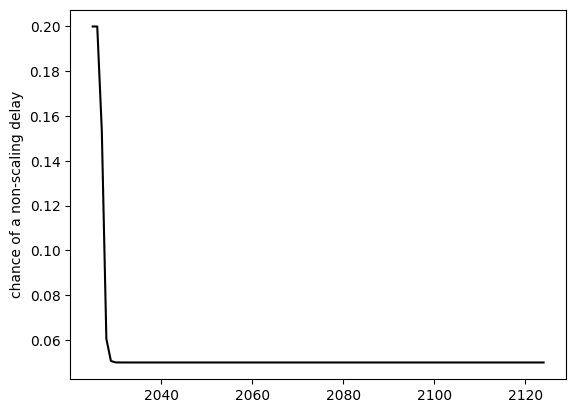

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - chan

In [2]:
nonscaling_points = [(2025, 0.2),
                     (2027, 0.15),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3085   | 1.841     | 1.548     | 7.556     |
| 3         | -0.2454   | 1.275     | 9.695     | 9.981     |
| 8         | -0.2131   | 0.4449    | 4.901     | 4.742     |
| 26        | -0.1324   | 0.7256    | 9.41      | 2.397     |
| 29        | -0.1199   | 1.222     | 8.66      | 0.6169    |
| 33        | -0.07854  | 0.3404    | 2.136     | 1.449     |
| 43        | -0.04347  | 1.035     | 9.887     | 1.041     |
| 66        | -0.02973  | 0.5471    | 9.175     | 1.448     |
Curve params found
{'push': 0.5470753332396583,
 'shift': 9.17549854793724,
 'slope': 1.4479367285117843}
-
## Chance of nonscaling delay ##


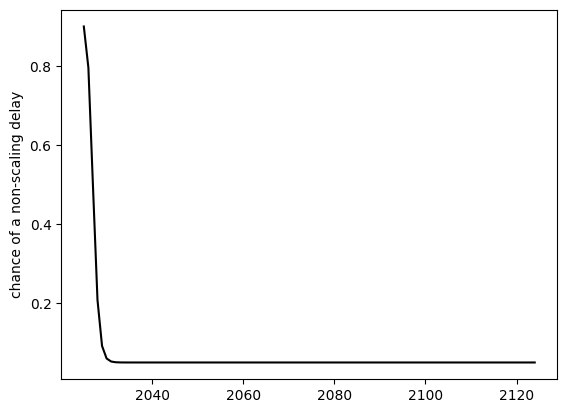

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - cha

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2025, 0.90),  # 0.2 power, 0.15 GPU supply, 0.2 latency/distributed, 0.8 buildup, 0.05 other => 1 - ((1 - 0.2) * (1 - 0.15) * (1 - 0.2) * (1 - 0.8) * (1 - 0.05)) = 0.90
                     (2026, 0.74), # 0.15 power, 0.1 GPU supply, 0.1 latency/distributed, 0.6 buildup, 0.05 other =>  1 - ((1 - 0.15) * (1 - 0.1) * (1 - 0.1) * (1 - 0.6) * (1 - 0.05)) = 0.74
                     (2027, 0.46), # 0.1 power, 0.05 GPU supply, 0.05 latency/distributed, 0.3 buildup, 0.05 other => 1 - ((1 - 0.1) * (1 - 0.05) * (1 - 0.05) * (1 - 0.3) * (1 - 0.05)) = 0.46
                     (2028, 0.23), # 0.05 power, 0.02 GPU supply, 0.05 latency/distributed, 0.1 buildup, 0.03 other =>  1 - ((1 - 0.05) * (1 - 0.02) * (1 - 0.05) * (1 - 0.1) * (1 - 0.03)) = 0.23
                     (2030, 0.11),  # 0.02 power, 0.01 GPU supply, 0.02 latency/distributed, 0.05 buildup, 0.02 other => 1 - ((1 - 0.02) * (1 - 0.01) * (1 - 0.02) * (1 - 0.05) * (1 - 0.02)) = 0.11
                     (2035, 0.05)] # 0.01 power, 0.01 GPU supply, 0.01 latency/distributed, 0.01 buildup, 0.01 other => 1 - ((1 - 0.01) * (1 - 0.01) * (1 - 0.01) * (1 - 0.01) * (1 - 0.01)) = 0.05

p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.009649 | 5.001     | 8.083     | 9.133     |
| 8         | -0.009627 | 3.654     | 4.054     | 7.426     |
| 13        | -0.003795 | 1.404     | 5.887     | 6.571     |
| 19        | -0.002078 | 1.202     | 9.754     | 6.692     |
| 26        | -0.000330 | 0.3857    | 3.357     | 7.606     |
| 38        | -1.152e-0 | 0.2285    | 7.712     | 9.78      |
| 41        | -0.0      | 0.01      | 5.002     | 9.761     |
Curve params found
{'push': 0.01, 'shift': 5.001623822994236, 'slope': 9.761099247711758}
-
## Chance of nonscaling delay ##


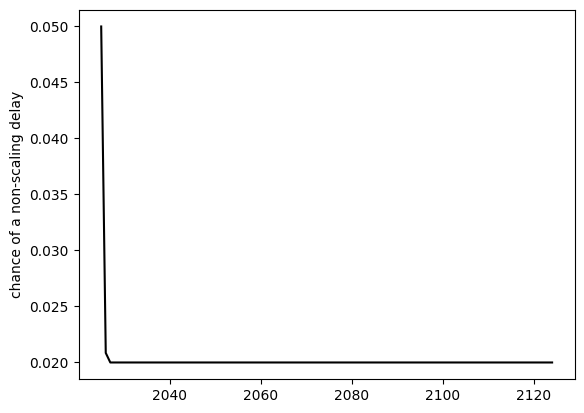

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2035 - chance 

In [4]:
nonscaling_points = [(2025, 0.05),
                     (2030, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

In [5]:
"""
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(1, 5)],
                                                                        [0.15, sq.lognorm(1, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))
"""
None

## Integration delay

In [6]:
"""
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.4),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))
"""
None

##  Real world feedback delay

In [7]:
"""
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))
"""
None

## Take off speeds

In [8]:
"""
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))
"""
None

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2025-01-23 11:52:18.921842
